In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("housing.csv")

In [3]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200


In [4]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700


In [5]:
data.dropna(inplace=True)

In [6]:
data.shape

(20433, 9)

In [7]:
data.isnull()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
20635,False,False,False,False,False,False,False,False,False
20636,False,False,False,False,False,False,False,False,False
20637,False,False,False,False,False,False,False,False,False
20638,False,False,False,False,False,False,False,False,False


In [8]:
data. isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

In [9]:
data.dtypes

longitude             float64
latitude              float64
housing_median_age      int64
total_rooms             int64
total_bedrooms        float64
population              int64
households              int64
median_income         float64
median_house_value      int64
dtype: object

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  int64  
 3   total_rooms         20433 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  int64  
 6   households          20433 non-null  int64  
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  int64  
dtypes: float64(4), int64(5)
memory usage: 1.6 MB


In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20433.0,-119.570689,2.003578,-124.3500,-121.8000,-118.4900,-118.010,-114.3100
latitude,20433.0,35.633221,2.136348,32.5400,33.9300,34.2600,37.720,41.9500
housing_median_age,20433.0,28.633094,12.591805,1.0000,18.0000,29.0000,37.000,52.0000
total_rooms,20433.0,2636.504233,2185.269567,2.0000,1450.0000,2127.0000,3143.000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.000,6445.0000
population,20433.0,1424.946949,1133.208490,3.0000,787.0000,1166.0000,1722.000,35682.0000
households,20433.0,499.433465,382.299226,1.0000,280.0000,409.0000,604.000,6082.0000
median_income,20433.0,3.871162,1.899291,0.4999,2.5637,3.5365,4.744,15.0001
median_house_value,20433.0,206864.413155,115435.667099,14999.0000,119500.0000,179700.0000,264700.000,500001.0000


In [12]:
from sklearn.model_selection import train_test_split
x = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

In [13]:
x

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-122.23,37.88,41,880,129.0,322,126,8.3252
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014
2,-122.24,37.85,52,1467,190.0,496,177,7.2574
3,-122.25,37.85,52,1274,235.0,558,219,5.6431
4,-122.25,37.85,52,1627,280.0,565,259,3.8462
...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603
20636,-121.21,39.49,18,697,150.0,356,114,2.5568
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672


In [14]:
y

0        452600
1        358500
2        352100
3        341300
4        342200
          ...  
20635     78100
20636     77100
20637     92300
20638     84700
20639     89400
Name: median_house_value, Length: 20433, dtype: int64

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [16]:
train_data = x_train.join(y_train) 

In [17]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
15441,-117.22,33.19,16,3004,656.0,1948,606,2.7019,216900
12580,-121.42,38.51,21,3249,666.0,2611,663,1.9423,87800
7882,-118.12,33.88,36,1083,218.0,557,210,3.0795,218400
211,-122.22,37.79,52,3424,690.0,2273,685,3.9048,164700
2339,-119.67,36.82,2,2579,376.0,1133,342,4.5577,123300
...,...,...,...,...,...,...,...,...,...
13972,-116.83,34.25,15,8948,1985.0,1316,514,2.7375,90800
16955,-122.30,37.53,40,1833,308.0,751,306,6.0000,384200
11375,-117.96,33.68,18,2594,539.0,817,485,2.3674,219200
2042,-119.69,36.74,23,2097,385.0,911,405,3.5128,121600


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

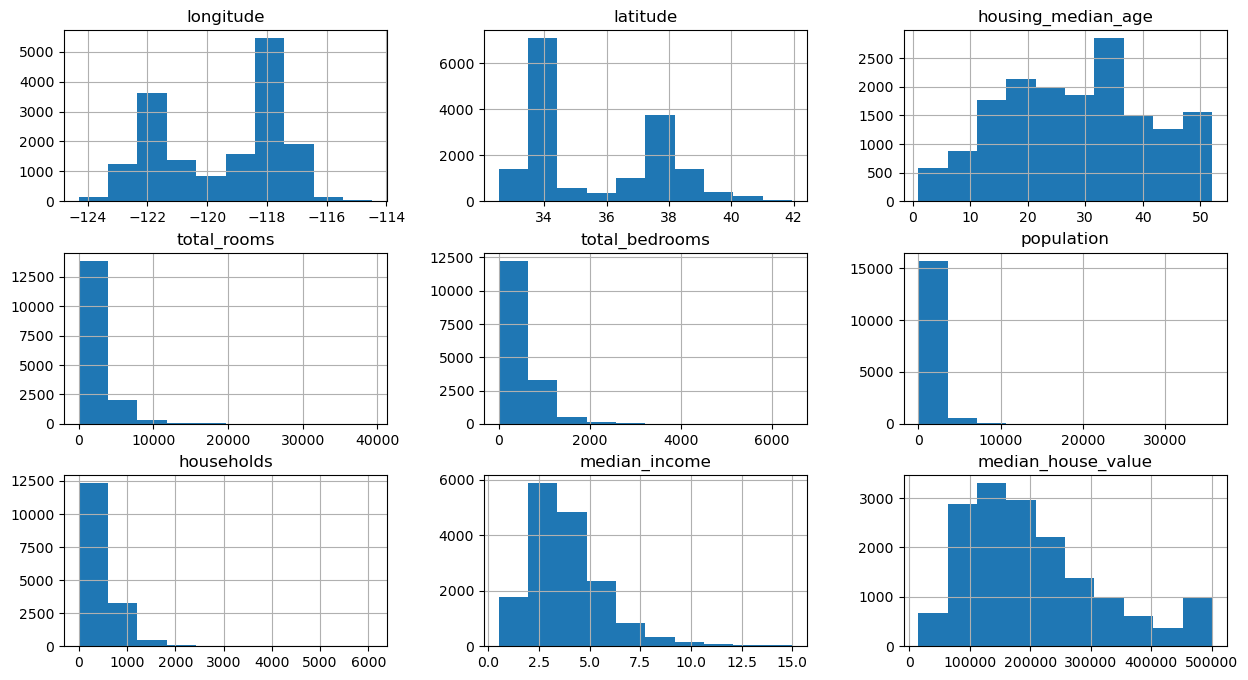

In [18]:
train_data.hist(figsize=(15, 8))

In [19]:
train_data.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924695,-0.105070,0.043500,0.066498,0.096788,0.054277,-0.012647,-0.037637
latitude,-0.924695,1.000000,0.007940,-0.036567,-0.065920,-0.107390,-0.070938,-0.081738,-0.151313
housing_median_age,-0.105070,0.007940,1.000000,-0.361203,-0.320266,-0.295999,-0.303539,-0.121481,0.103427
total_rooms,0.043500,-0.036567,-0.361203,1.000000,0.930765,0.857026,0.919118,0.195163,0.134487
total_bedrooms,0.066498,-0.065920,-0.320266,0.930765,1.000000,0.877159,0.980669,-0.008224,0.050960
population,0.096788,-0.107390,-0.295999,0.857026,0.877159,1.000000,0.905407,0.003409,-0.024467
households,0.054277,-0.070938,-0.303539,0.919118,0.980669,0.905407,1.000000,0.011525,0.065767
median_income,-0.012647,-0.081738,-0.121481,0.195163,-0.008224,0.003409,0.011525,1.000000,0.689652
median_house_value,-0.037637,-0.151313,0.103427,0.134487,0.050960,-0.024467,0.065767,0.689652,1.000000


<Axes: >

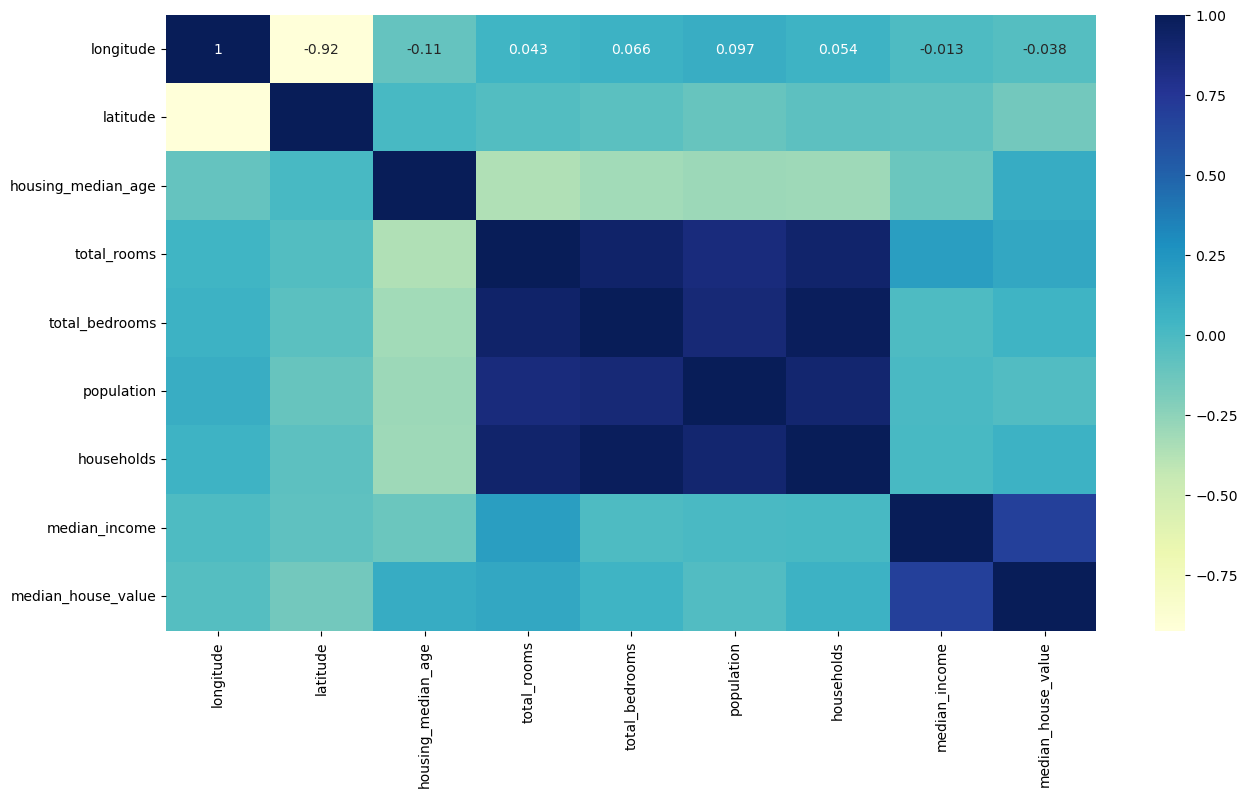

In [20]:
plt.figure(figsize=(15, 8)) 
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

In [21]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

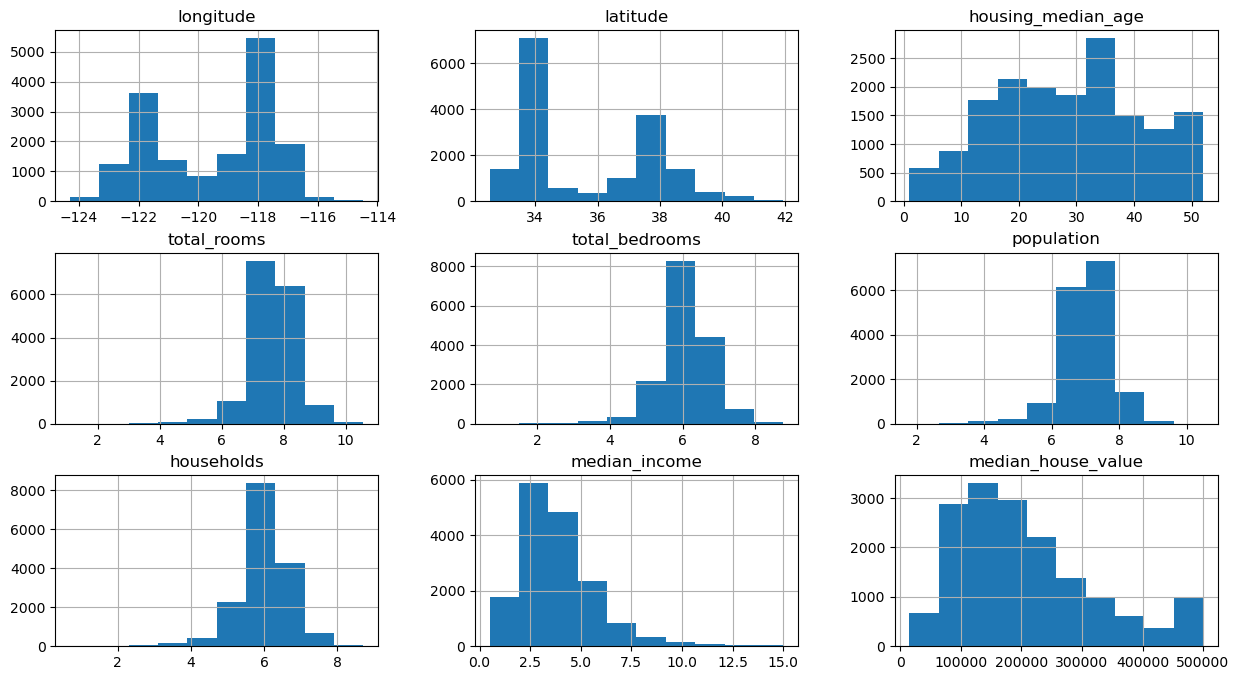

In [22]:
train_data.hist(figsize=(15, 8))

In [23]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
15441,-117.22,33.19,16,8.008033,6.487684,7.575072,6.408529,2.7019,216900
12580,-121.42,38.51,21,8.086410,6.502790,7.867871,6.498282,1.9423,87800
7882,-118.12,33.88,36,6.988413,5.389072,6.324359,5.351858,3.0795,218400
211,-122.22,37.79,52,8.138857,6.538140,7.729296,6.530878,3.9048,164700
2339,-119.67,36.82,2,7.855545,5.932245,7.033506,5.837730,4.5577,123300
...,...,...,...,...,...,...,...,...,...
13972,-116.83,34.25,15,9.099297,7.593878,7.183112,6.244167,2.7375,90800
16955,-122.30,37.53,40,7.514255,5.733341,6.622736,5.726848,6.0000,384200
11375,-117.96,33.68,18,7.861342,6.291569,6.706862,6.186209,2.3674,219200
2042,-119.69,36.74,23,7.648740,5.955837,6.815640,6.006353,3.5128,121600


<Axes: >

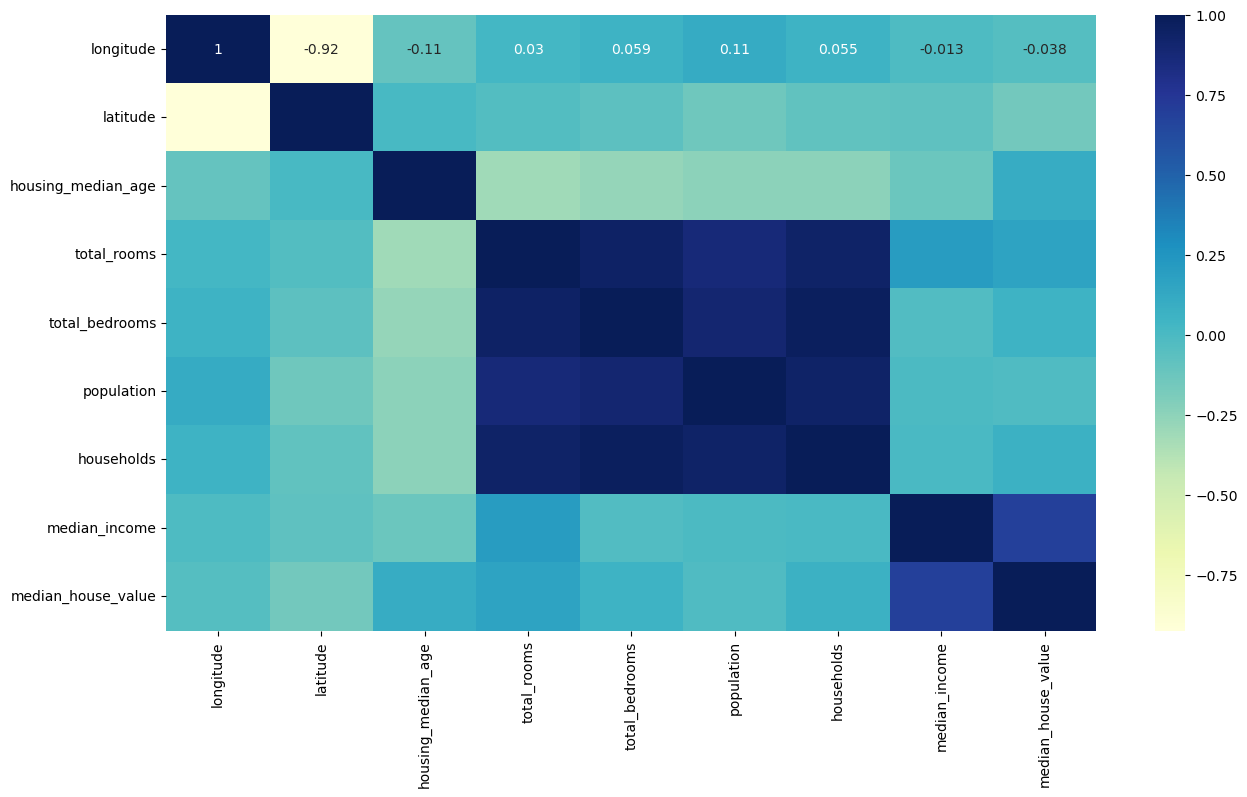

In [24]:
plt.figure(figsize=(15, 8)) 
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

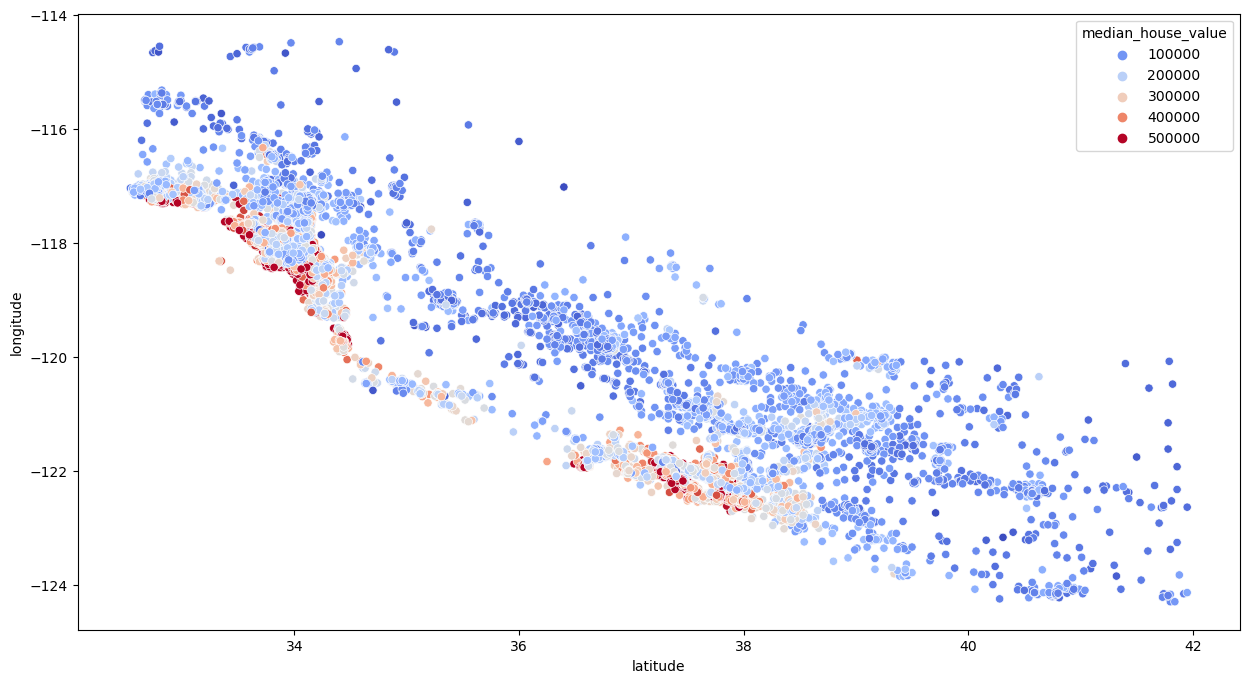

In [25]:
plt.figure(figsize=(15, 8)) 
sns.scatterplot(x="latitude", y="longitude", data=train_data, hue="median_house_value", palette="coolwarm")

In [26]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

<Axes: >

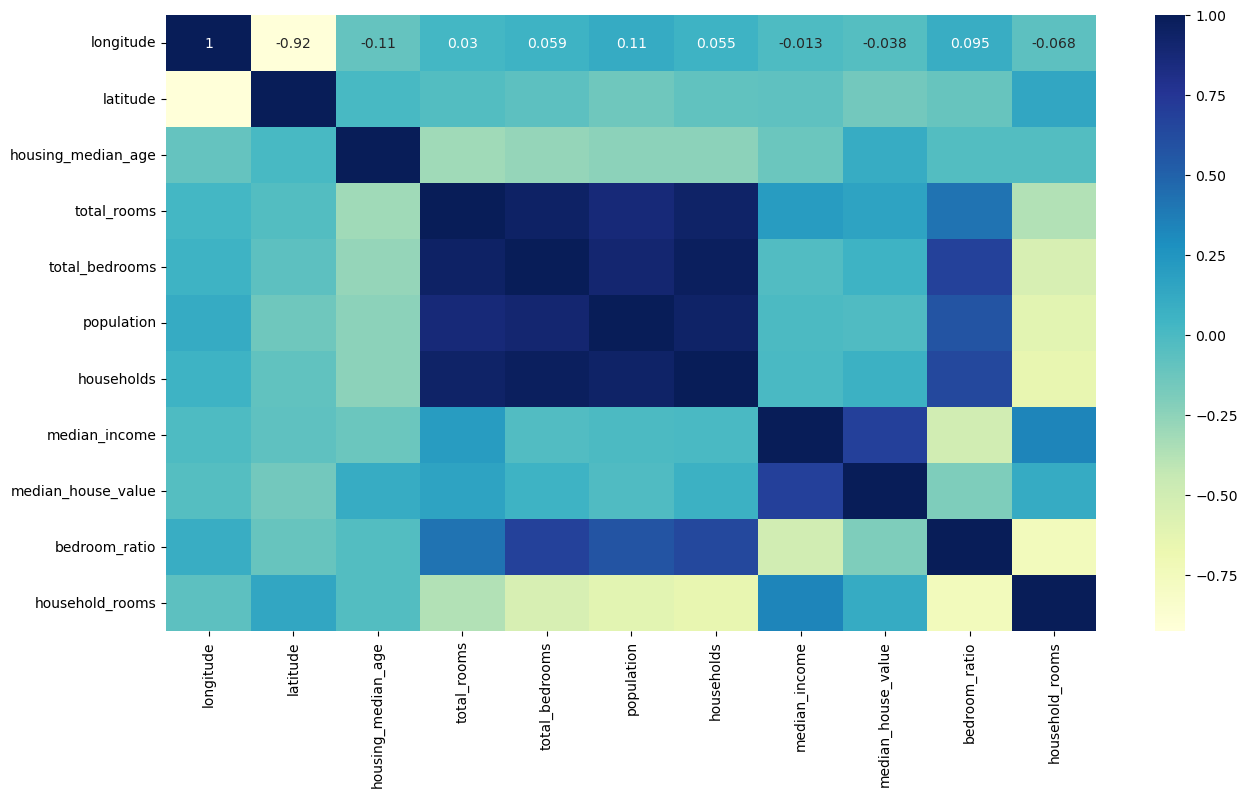

In [27]:
plt.figure(figsize=(15, 8)) 
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

In [28]:
from sklearn.linear_model import LinearRegression 

x_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']

reg = LinearRegression()

reg.fit(x_train, y_train)

LinearRegression()

In [29]:
test_data = x_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)



test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']

In [30]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,bedroom_ratio,household_rooms
14779,-117.08,32.57,9,8.748146,7.321850,8.401109,7.284135,2.5690,88300,0.836960,1.200986
16927,-122.33,37.58,43,7.480428,6.047372,7.361375,5.996452,2.7474,233100,0.808426,1.247476
17416,-120.46,34.65,22,7.169350,5.883322,7.149132,5.897154,1.6488,117500,0.820621,1.215731
429,-122.28,37.88,52,7.085064,5.303305,6.228511,5.337538,4.1912,254500,0.748519,1.327403
17670,-121.87,37.30,28,6.756932,5.298317,6.122493,5.356586,2.3293,215900,0.784131,1.261425
...,...,...,...,...,...,...,...,...,...,...,...
14985,-117.02,32.74,30,8.344267,6.650279,7.607381,6.599870,3.5000,144700,0.796988,1.264308
3857,-118.43,34.17,34,7.687539,6.052089,6.810142,6.063785,4.4464,353100,0.787260,1.267779
12865,-121.34,38.69,17,7.585281,5.899897,6.904751,5.805135,3.7031,114300,0.777809,1.306650
1041,-120.98,38.34,27,8.152486,6.483107,7.492203,6.398595,3.5508,99100,0.795231,1.274106


In [31]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,bedroom_ratio,household_rooms
15441,-117.22,33.19,16,8.008033,6.487684,7.575072,6.408529,2.7019,216900,0.810147,1.249590
12580,-121.42,38.51,21,8.086410,6.502790,7.867871,6.498282,1.9423,87800,0.804163,1.244392
7882,-118.12,33.88,36,6.988413,5.389072,6.324359,5.351858,3.0795,218400,0.771144,1.305792
211,-122.22,37.79,52,8.138857,6.538140,7.729296,6.530878,3.9048,164700,0.803324,1.246212
2339,-119.67,36.82,2,7.855545,5.932245,7.033506,5.837730,4.5577,123300,0.755167,1.345650
...,...,...,...,...,...,...,...,...,...,...,...
13972,-116.83,34.25,15,9.099297,7.593878,7.183112,6.244167,2.7375,90800,0.834557,1.457248
16955,-122.30,37.53,40,7.514255,5.733341,6.622736,5.726848,6.0000,384200,0.762995,1.312110
11375,-117.96,33.68,18,7.861342,6.291569,6.706862,6.186209,2.3674,219200,0.800317,1.270785
2042,-119.69,36.74,23,7.648740,5.955837,6.815640,6.006353,3.5128,121600,0.778669,1.273442


In [32]:
x_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']

In [33]:
reg.score(x_test, y_test)

0.662892294578693

In [34]:
reg.score(x_train, y_train)

0.6652026728856839

In [35]:
y_pred = reg.predict(x_test)

In [36]:
from sklearn.metrics import mean_squared_error

In [37]:
import math

In [38]:
math.sqrt(mean_squared_error(y_test, y_pred))

66595.24010469446

In [39]:
data_new = x_train[:1]

In [40]:
reg.predict(data_new)

array([141771.58275153])

In [41]:
y_train[:1]

15441    216900
Name: median_house_value, dtype: int64

In [42]:
from sklearn.ensemble import RandomForestRegressor 

forest = RandomForestRegressor()

forest.fit(x_train, y_train)

RandomForestRegressor()

In [43]:
forest.score(x_test, y_test)

0.8000571111985234

In [44]:
forest.score(x_train, y_train)

0.9726564207810826

In [45]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

X = test_data.drop(['median_house_value'], axis=1)
Y = test_data['median_house_value']

# Split the training set into 
# training and validation set
X_train, X_valid, Y_train, Y_valid = train_test_split(
	X, Y, train_size=0.8, test_size=0.2, random_state=0)

In [46]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error

model_SVR = svm.SVR()
model_SVR.fit(X_train, Y_train)
Y_pred = model_SVR.predict(X_valid)

print(mean_absolute_percentage_error(Y_valid, Y_pred))

0.5151493283359775


In [47]:
from sklearn.ensemble import RandomForestRegressor

model_RFR = RandomForestRegressor(n_estimators=10)
model_RFR.fit(X_train, Y_train)
Y_pred = model_RFR.predict(X_valid)

mean_absolute_percentage_error(Y_valid, Y_pred)

0.23870883326999495

In [48]:
from sklearn.linear_model import LinearRegression

model_LR = LinearRegression()
model_LR.fit(X_train, Y_train)
Y_pred = model_LR.predict(X_valid)

print(mean_absolute_percentage_error(Y_valid, Y_pred))

0.2788069221467079


In [49]:
data = data[["housing_median_age", "total_rooms", "total_bedrooms", "population", "median_income", "median_house_value"]]
data = data.rename({"median_house_value": "median_house_value"}, axis=1)
data.head()

,housing_median_age,total_rooms,total_bedrooms,population,median_income,median_house_value
0,41,880,129.0,322,8.3252,452600
1,21,7099,1106.0,2401,8.3014,358500
2,52,1467,190.0,496,7.2574,352100
3,52,1274,235.0,558,5.6431,341300
4,52,1627,280.0,565,3.8462,342200


In [50]:
data  = data .dropna()
data.isnull().sum()

housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
median_income         0
median_house_value    0
dtype: int64

In [51]:
x =  data .drop("median_house_value", axis=1)
y =  data ["median_house_value"]

In [52]:
from sklearn.linear_model import LinearRegression
linear_reg =  LinearRegression()
linear_reg.fit(x , y)

LinearRegression()

In [53]:
y_pred  = linear_reg.predict(x)

In [54]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
error = np.sqrt(mean_squared_error(y , y_pred))

In [55]:
error

76422.27233386412

In [56]:
from sklearn.tree import DecisionTreeRegressor
dec_tree_reg = DecisionTreeRegressor(random_state=0)
dec_tree_reg.fit(x , y)

DecisionTreeRegressor(random_state=0)

In [57]:
y_pred = dec_tree_reg.predict(x)

In [58]:
error = np.sqrt(mean_squared_error(y , y_pred))
print("${:,.02f}".format(error))

$0.00


In [ ]:
from sklearn.ensemble import RandomForestRegressor 
random_forest_reg = RandomForestRegressor(random_state=0)
random_forest_reg.fit(x , y)

In [ ]:
y_pred = random_forest_reg.predict(x)

In [ ]:
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

In [ ]:
x